<a href="https://colab.research.google.com/github/Gasimmmmmmmmmm/Python_Finance_Deep_Learning/blob/main/LSTM_Hisse_Senedi_Mum_Grafik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings("ignore")


# 1. Veri Hazırlama


In [ ]:
train_tickers = [
    "AAPL", "MSFT", "AMZN", "GOOGL", "META", "TSLA", "BRK-B", "JNJ", "V", "JPM",
    "WMT", "PG", "NVDA", "MA", "UNH", "HD", "BAC", "XOM", "CVX", "KO",
    "PEP", "COST", "MCD", "DIS", "NFLX", "ADBE", "CRM", "ORCL", "INTC",
    "CSCO", "VZ", "T", "PFE", "MRK", "ABBV", "LLY", "AMGN", "BMY", "GILD",
    "MMM", "HON", "BA", "LMT", "GE", "F", "GM", "IBM", "AXP", "GS", "MS"
]

def create_sequences(data, window_size=60, horizon=1):
    X, y = [], []
    for i in range(window_size, len(data) - horizon):
        X.append(data[i - window_size:i])
        y.append(data[i + horizon])
    return np.array(X), np.array(y)

window_size = 60
horizon = 1

scaler = MinMaxScaler()
X_all, y_all = [], []

for ticker in train_tickers:
    df = yf.download(ticker, start="2010-01-01", end="2025-07-30")[["Open", "High", "Low", "Close"]].dropna()
    scaled = scaler.fit_transform(df)
    X, y = create_sequences(scaled, window_size, horizon)
    X_all.append(X)
    y_all.append(y)

X_train = np.concatenate(X_all)
y_train = np.concatenate(y_all)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

# 2. Model Tanımı ve Eğitimi

In [ ]:
model = Sequential([
    LSTM(124, activation='relu', return_sequences=True, input_shape=(window_size, 4)),
    LSTM(64, activation='relu', return_sequences=False),
    Dense(32, activation='relu'),
    Dense(4)
])
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=35, batch_size=64, validation_split=0.1)


Epoch 1/35
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step - loss: 0.0083 - val_loss: 1.8325e-04
Epoch 2/35
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - loss: 1.7755e-04 - val_loss: 1.8112e-04
Epoch 3/35
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - loss: 1.6926e-04 - val_loss: 1.8134e-04
Epoch 4/35
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - loss: 1.6091e-04 - val_loss: 2.1307e-04
Epoch 5/35
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - loss: 1.5903e-04 - val_loss: 1.7053e-04
Epoch 6/35
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - loss: 1.5673e-04 - val_loss: 1.6907e-04
Epoch 7/35
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - loss: 1.5063e-04 - val_loss: 1.6830e-04
Epoch 8/35
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - loss: 1.4877e-04 - val_loss: 1.6059e-04
Epoch 9/35
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - loss: 1.4746e-04 - val_loss: 1.6461e-04
Epoch 10/35
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - loss: 1.4869e-04 - val_loss: 1.7222e-04
Epoch 11/35
2687/2687 ━

# 3. Modeli Kaydetme


In [ ]:
model_dir = "saved_model"
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, "lstm_stock_model_23.h5")
model.save(model_path)
print(f"Model kaydedildi: {model_path}")


Model kaydedildi: saved_model/lstm_stock_model_23.h5


# 4. Eğitim Kaybı Görselleştirme


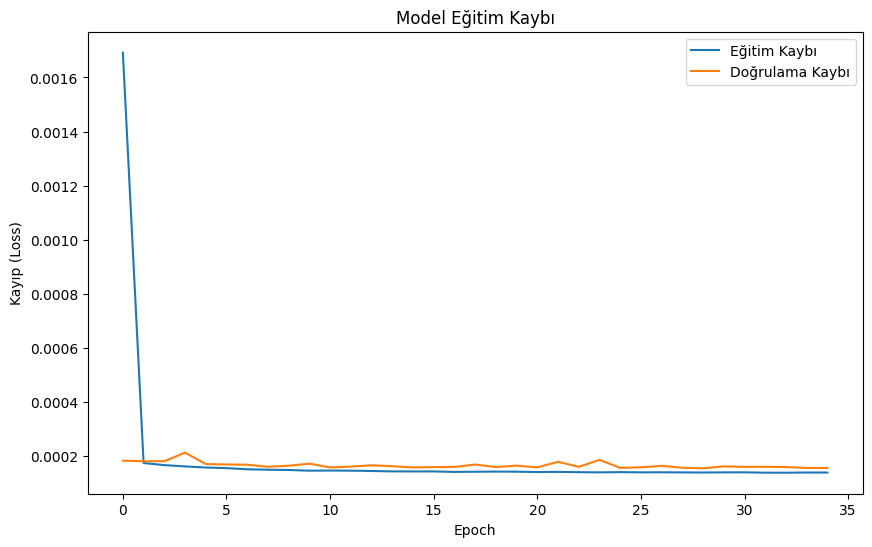

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Eğitim Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp (Loss)')
plt.legend()
plt.show()

# 5. Test Aşaması


In [ ]:
test_ticker = "TSLA"
test_df = yf.download(test_ticker, start="2020-01-01", end="2025-07-30")[["Open", "High", "Low", "Close"]].dropna()

scaler_test = MinMaxScaler()
scaled_test = scaler_test.fit_transform(test_df)

X_test, y_test = create_sequences(scaled_test, window_size, horizon)

# Tahmin
y_pred_scaled = model.predict(X_test)
y_pred = scaler_test.inverse_transform(y_pred_scaled)
y_true = scaler_test.inverse_transform(y_test)

# Performans
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"\nTest Sonuçları:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


[*********************100%***********************]  1 of 1 completed

19/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Test Sonuçları:
Mean Squared Error (MSE): 150.7244
Mean Absolute Error (MAE): 8.8917
R² Score: 0.9759


# 6. Tahmin Sonuçlarının Görselleştirilmesi


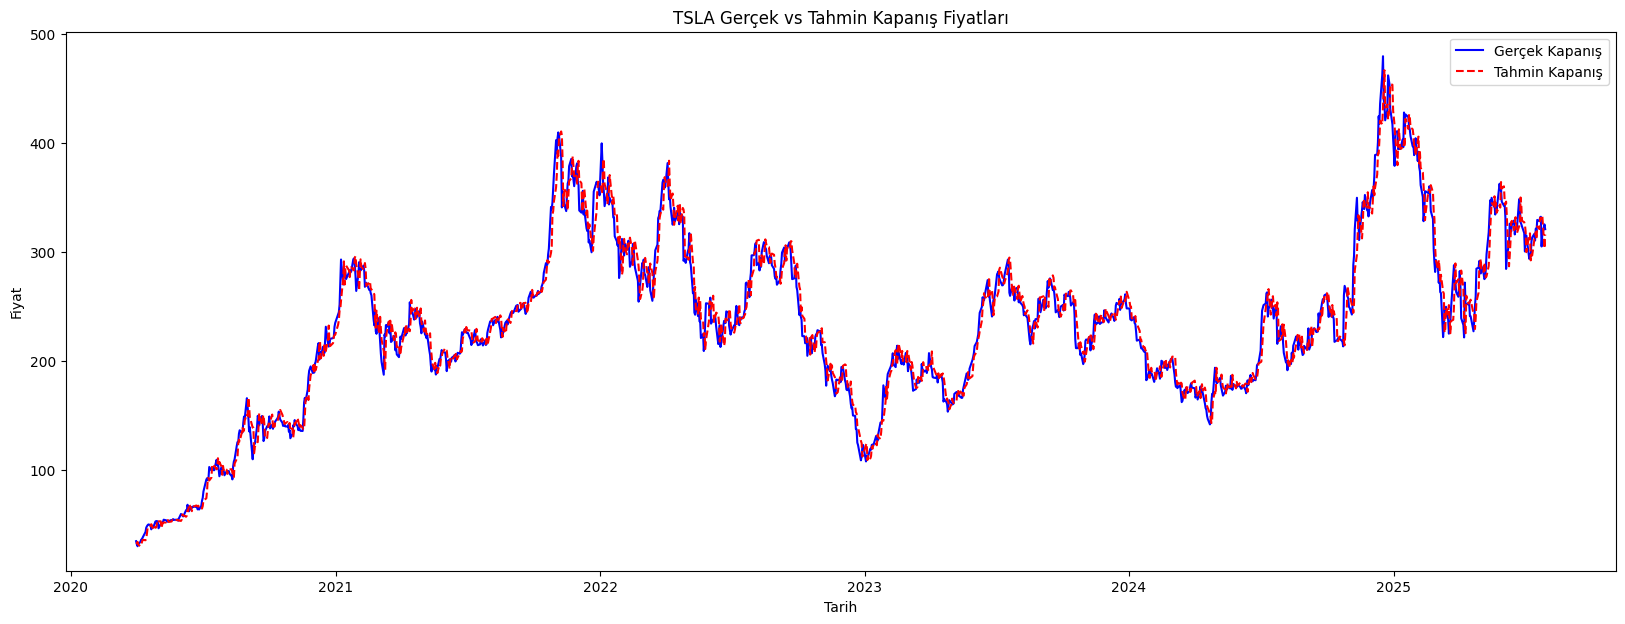

In [ ]:
test_dates = test_df.index[window_size + horizon:]
plt.figure(figsize=(20, 7))
plt.plot(test_dates[:len(y_true)], y_true[:, 3], label='Gerçek Kapanış', color='blue')
plt.plot(test_dates[:len(y_pred)], y_pred[:, 3], label='Tahmin Kapanış', color='red', linestyle='--')
plt.title(f'{test_ticker} Gerçek vs Tahmin Kapanış Fiyatları')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()
plt.show()

# 7. Güven Aralığı Hesablanması


Enter the start date (YYYY-MM-DD): 2024-08-30
Enter the end date (YYYY-MM-DD): 2025-08-31
Standard Deviation of Error (Close): 19.0794
95% Güven Aralığı (Kapanış Tahmin Hatası): [-2.1402, 2.8615]


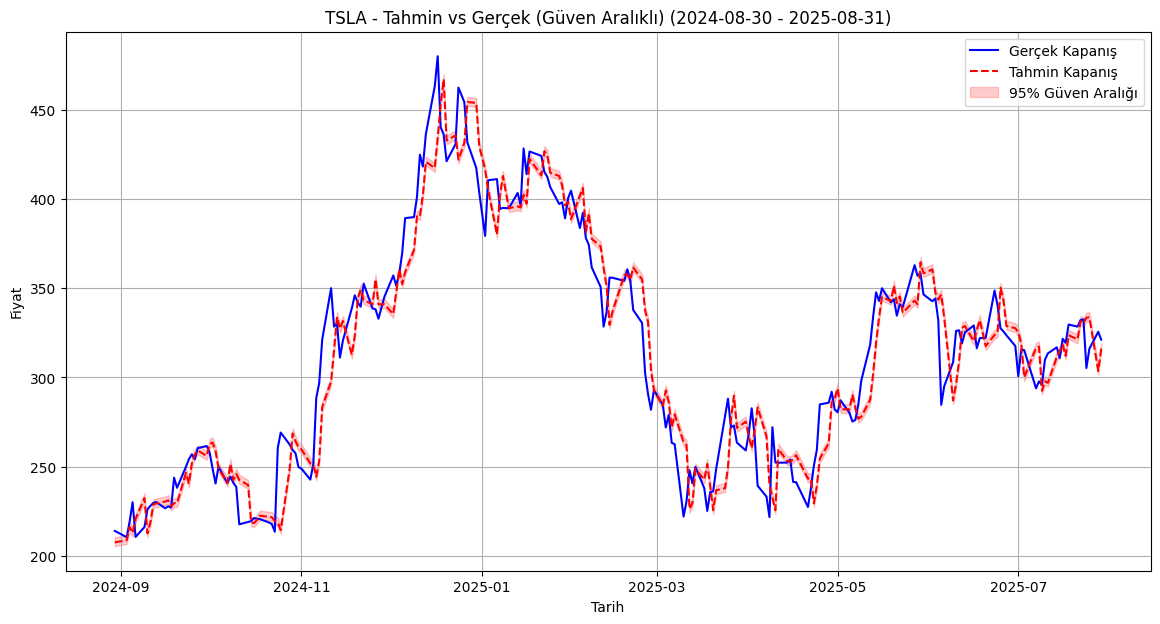

In [ ]:
import scipy.stats as st

# Kullanıcıdan tarih aralığı alınır
start_date = pd.to_datetime(input("Enter the start date (YYYY-MM-DD): "))
end_date = pd.to_datetime(input("Enter the end date (YYYY-MM-DD): "))

# Zaman ekseni filtrelenir (önceden oluşturulmuş test_dates ile)
filtered_mask = (test_dates >= start_date) & (test_dates <= end_date)
filtered_dates = test_dates[filtered_mask]
filtered_y_true = y_true[filtered_mask]
filtered_y_pred = y_pred[filtered_mask]

# Gerçek ve tahmin farkı (Close sütunu için)
difference = filtered_y_true[:, 3] - filtered_y_pred[:, 3]

# Standart sapma
std_dev = np.std(difference)
print(f"Standard Deviation of Error (Close): {std_dev:.4f}")

# Güven aralığı (%95)
confidence_level = 0.95
dof = len(difference) - 1
mean_diff = np.mean(difference)
sem = st.sem(difference)
ci = st.t.interval(confidence_level, dof, loc=mean_diff, scale=sem)

print(f"95% Güven Aralığı (Kapanış Tahmin Hatası): [{ci[0]:.4f}, {ci[1]:.4f}]")

# Tahmin kapanış fiyatlarına güven aralığını uygula
lower_bound = filtered_y_pred[:, 3] + ci[0]
upper_bound = filtered_y_pred[:, 3] + ci[1]

# Görselleştirme
plt.figure(figsize=(14, 7))
plt.plot(filtered_dates, filtered_y_true[:, 3], label='Gerçek Kapanış', color='blue')
plt.plot(filtered_dates, filtered_y_pred[:, 3], label='Tahmin Kapanış', color='red', linestyle='--')
plt.fill_between(filtered_dates, lower_bound, upper_bound, color='red', alpha=0.2, label='95% Güven Aralığı')
plt.title(f"{test_ticker} - Tahmin vs Gerçek (Güven Aralıklı) ({start_date.date()} - {end_date.date()})")
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()
plt.grid(True)
plt.show()


Tahmin edilen kapanış fiyatı, çoğu zaman (yaklaşık %95 ihtimalle) gerçek değerden en fazla +2.86 TL yukarıda veya -2.14 TL aşağıda olacaktır.

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import pandas.tseries.offsets as offsets
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

model_path = "saved_model/lstm_stock_model_23.h5"
model = load_model(model_path, custom_objects={'mse': MeanSquaredError()})

test_ticker = "NVDA"
start_date = "2025-05-28"
end_date = "2025-08-30"
df_test = yf.download(test_ticker, start=start_date, end=end_date)[["Open", "High", "Low", "Close"]]
df_test.dropna(inplace=True)

scaler = MinMaxScaler()
scaled_test = scaler.fit_transform(df_test)

# Son 60 günü al
window_size = 60
X_input = scaled_test[-window_size:]
X_input = np.expand_dims(X_input, axis=0)

# Bir gün sonrası Model tahmini
pred_scaled = model.predict(X_input)
predicted_ohlcv = scaler.inverse_transform(pred_scaled)[0]

# Tarihler
dates_real = df_test.index[-window_size:]
next_business_day = dates_real[-1] + offsets.BDay(1)
dates_all = dates_real.append(pd.Index([next_business_day]))

# Veriler (Gerçek + Tahmin)
open_vals = np.append(df_test['Open'][-window_size:].values, predicted_ohlcv[0])
high_vals = np.append(df_test['High'][-window_size:].values, predicted_ohlcv[1])
low_vals = np.append(df_test['Low'][-window_size:].values, predicted_ohlcv[2])
close_vals = np.append(df_test['Close'][-window_size:].values, predicted_ohlcv[3])

# Grafik oluştur
fig = go.Figure(data=[go.Candlestick(
    x=dates_all,
    open=open_vals,
    high=high_vals,
    low=low_vals,
    close=close_vals,
    increasing_line_color='green',
    decreasing_line_color='red',
)])

fig.add_trace(go.Scatter(
    x=[next_business_day],
    y=[predicted_ohlcv[1]],
    text=["Tahmin"],
    mode="text",
    showlegend=False,
    textposition="top center",
    textfont=dict(color="blue", size=14, family="Arial")
))

# Tahmin mum için bilgi kutusu
annotation_text = (
    f"Open: {predicted_ohlcv[0]:.2f}<br>"
    f"High: {predicted_ohlcv[1]:.2f}<br>"
    f"Low: {predicted_ohlcv[2]:.2f}<br>"
    f"Close: {predicted_ohlcv[3]:.2f}<br>"
)

fig.add_annotation(
    x=next_business_day,
    y=predicted_ohlcv[1],
    text=annotation_text,
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-100,
    bgcolor="lightblue",
    bordercolor="blue",
    borderwidth=1,
    borderpad=4,
    font=dict(color="blue", size=12)
)

fig.update_layout(
    title=f"{test_ticker} - Son {window_size} Gün Gerçek ve {next_business_day.date()} Tahmini Mum Grafiği",
    xaxis_title="Tarih",
    yaxis_title="Fiyat",
    xaxis_rangeslider_visible=False
)

fig.show()

[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
